In [1]:
import pandas as pd
import numpy as np
from numpy import random
from math import log

# Visualizations
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

#Distribucion Normal
from scipy.stats import norm, kstest

#Test de normalidad
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

#
from termcolor import colored, cprint

#widgets
import ipywidgets as widgets

In [2]:
from scipy import stats


def freedman_diaconis(data, returnas="width"):
    """
    Use Freedman Diaconis rule to compute optimal histogram bin width. 
    ``returnas`` can be one of "width" or "bins", indicating whether
    the bin width or number of bins should be returned respectively. 


    Parameters
    ----------
    data: np.ndarray
        One-dimensional array.

    returnas: {"width", "bins"}
        If "width", return the estimated width for each histogram bin. 
        If "bins", return the number of bins suggested by rule.
    """
    data = np.asarray(data, dtype=np.float_)
    IQR  = stats.iqr(data, rng=(25, 75), scale="raw", nan_policy="omit")
    N    = data.size
    bw   = (2 * IQR) / np.power(N, 1/3)

    if returnas=="width":
        result = bw
    else:
        datmin, datmax = data.min(), data.max()
        datrng = datmax - datmin
        result = int((datrng / bw) + 1)
    return(result)

In [3]:
#Definición de mineria depequeña escala
smallScaleMin = 3200 
smalScaleMax  = 1000000

logSmallScaleMin = np.log10(smallScaleMin)
logSmallScaleMax  = np.log10(smalScaleMax)

In [4]:
modelLst = ["15a", "25e", "25c", "25g", "25b", "22c", "34f"]
modelDict = {"15a":"6a", "25e":"7c", "25c":"7b", "25g":"7a", "25b":"7e", "22c":"14c", "34f":"9e"}


In [5]:
modelType = widgets.Dropdown(options=modelLst,
                             description='Modelo de Depósito:',
                             disabled=False,)
display(modelType)

Dropdown(description='Modelo de Depósito:', options=('15a', '25e', '25c', '25g', '25b', '22c', '34f'), value='…

In [6]:
#Se guardan los datos y parametros como tuples 

fileName = "../data/" + modelType.value + ".csv"
#print(fileName)
modelTable = pd.read_csv(fileName)
#modelTable.head()
    
#Por cada modelo hay que obtener los estadisticos de Tonne
modelTonne = modelTable["tonn"]
modelTuple = (modelType.value,
              modelTonne,
              modelTonne.size, 
              modelTonne.min(), 
              modelTonne.max(), 
              np.mean(modelTonne), 
              np.median(modelTonne) )


In [7]:
print(f"Modelo: %s, %s, %s, {modelTuple[5]:.2f}, {modelTuple[6]:.2f}" % (modelTuple[0],modelTuple[3], modelTuple[4] ))

Modelo: 15a, 26910.0, 22000000.0, 2779800.56, 1332500.00


In [8]:
#Obtención del logaritmo 10 de los tonelajes
modelDataTonne = np.log10(np.array(modelTuple[1]))

In [9]:
# datos de yacimientos
calcatreuDepName   = 'Calcatreu v49-Nelson'
calcatreuIndicTonn = 7.83 * 10 ** 6
calcatreuAu        = 2.28
calcatreuAg        = 20.29

castroSurDepName   = 'Castro Sur'
castroSurIndicTonn = 2.010 * 10 ** 6
castroSurAu        = 1.40
castroSurAg        = 14.77

## BOX Plots

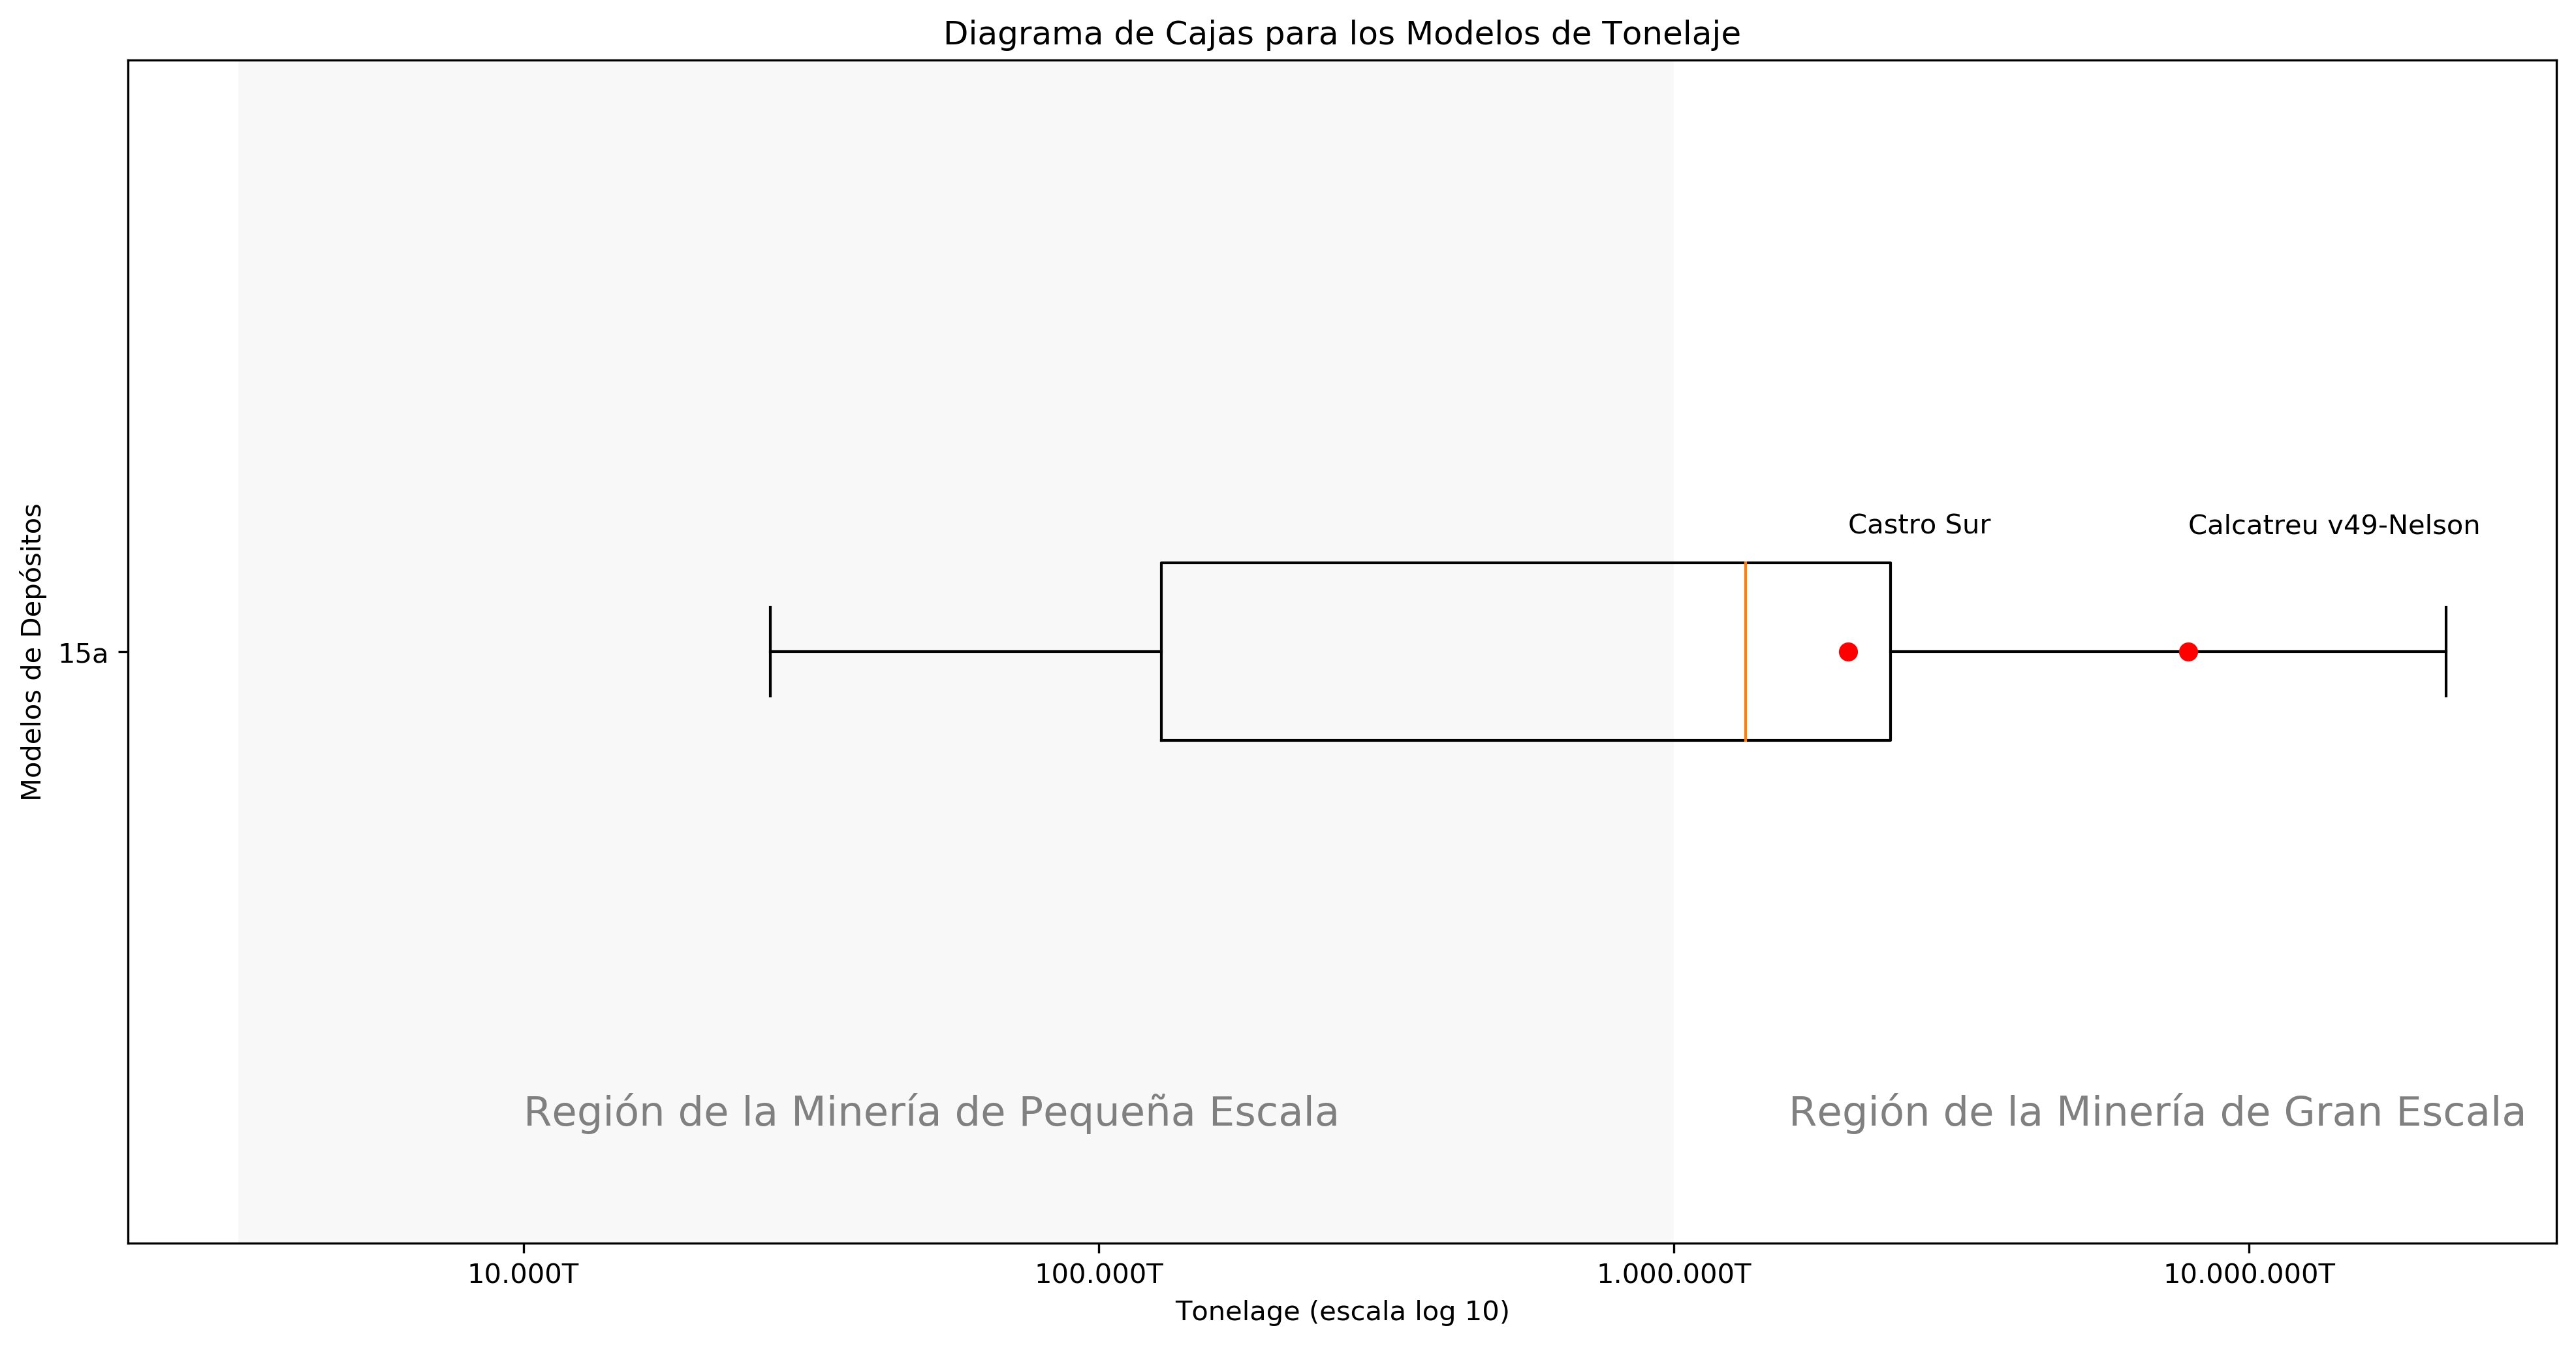

In [10]:
plt.figure(num=None, figsize=(16, 8), dpi=300, facecolor='w', edgecolor='k')

plt.title("Diagrama de Cajas para los Modelos de Tonelaje")
plt.xlabel("Tonelage (escala log 10)")
plt.ylabel("Modelos de Depósitos")


b         = plt.boxplot(modelDataTonne, vert=False, patch_artist=False,)
bWhiskers =[item.get_xdata() for item in b['whiskers']]
bMedians  =[item.get_xdata() for item in b['medians']]
bCaps     =[item.get_xdata() for item in b['caps']]
bBoxes    =[item.get_xdata() for item in b['boxes']]

plt.yticks([1], [modelType.value] )

locs, currentXticks = plt.xticks()
#xTickLabelLst = [ '{:,.0f}'.format(x)for x in 10 ** currentXticks]

plt.axvspan(logSmallScaleMin, logSmallScaleMax, facecolor='#bbbbbb', alpha=0.1)

currentXticks = [4,5,6,7,8,9,10,11]
#xTickLabelLst = [['{:,.0f}T'.format( 10 ** x) for x in currentXticks]]
xTickLabelLst = ['10.000T', '100.000T', '1.000.000T', '10.000.000T', '100.000.000T', '1.000.000.000T',
                 '10.000.000.000T', '100.000.000.000T']

plt.xticks(currentXticks, xTickLabelLst)
#currentXticks = plt.xticks()[0]
#xTickLabelLst = ['{:,.0f}'.format(x) for x in 10 ** currentXticks]


#plt.axvline(x=logSmallScaleMin, color='r')
#plt.axvline(x=logSmallScaleMax, color='r')

plt.text(4, 0.6, 'Región de la Minería de Pequeña Escala', fontsize=15, color="grey")
plt.text(6.2, 0.6, 'Región de la Minería de Gran Escala', fontsize=15, color="grey")


#Ploteo de los depósitos
plt.plot(np.log10(calcatreuIndicTonn),1, 'ro')
plt.text(np.log10(calcatreuIndicTonn), 1.10,calcatreuDepName )
plt.plot(np.log10(castroSurIndicTonn),1, 'ro')
plt.text(np.log10(castroSurIndicTonn), 1.10,castroSurDepName )

#plt.plot([4.38021124,  8.02938378],[1,1],'ro')
#plt.plot(6.13987909,1,'go')
#plt.plot([5.58795875, 6.86763972],[1,1], 'bo')

plt.show()


 Los yacimientos entre 3200 - 1.000.000 Tonne son de mineria de pequeña escala

Faltaría agregar al gráfico los valores de los percentiles

In [11]:
bWhiskers

[array([5.10896921, 4.4299137 ]), array([6.37639347, 7.34242268])]

In [12]:
bMedians

[array([6.124538, 6.124538])]

In [13]:
b

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa296438cf8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa2964523c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa2964388d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa296452a58>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa296452da0>],
 'means': []}

In [14]:
bCaps

[array([4.4299137, 4.4299137]), array([7.34242268, 7.34242268])]

In [15]:
bBoxes

[array([5.10896921, 5.10896921, 6.37639347, 6.37639347, 5.10896921])]